<a href="https://colab.research.google.com/github/Bao3333/MachineLearning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
資料量多寡->問題難易多(欄位多寡)
機器學習:千～萬
深度學習:萬～十萬

決策樹優點:可解釋性極高
"""

'\n資料量多寡->問題難易多(欄位多寡)\n機器學習:千～萬\n深度學習:萬～十萬\n'

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# 資料先用pandas整理成表格

iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 進入物機器學習階段使用numpy(模擬資料來源為表格的情況,須將表格轉換成array)

import numpy as np
# ↓input
x = np.array(df.drop(["ans"], axis=1))
# ↓output
y = np.array(df["ans"])


In [ ]:
# 將資料切分成訓練/測試兩部分

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
# 把資料丟給演算法學習

from sklearn.tree import DecisionTreeClassifier
# ↓建一棵樹(設定樹的最大深度)
clf = DecisionTreeClassifier(max_depth=2)
#    ↓進行訓練(餵訓練資料/答案)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.6\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 48\nvalue = [0, 44, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [0, 1, 41]\nclass = virginica')]

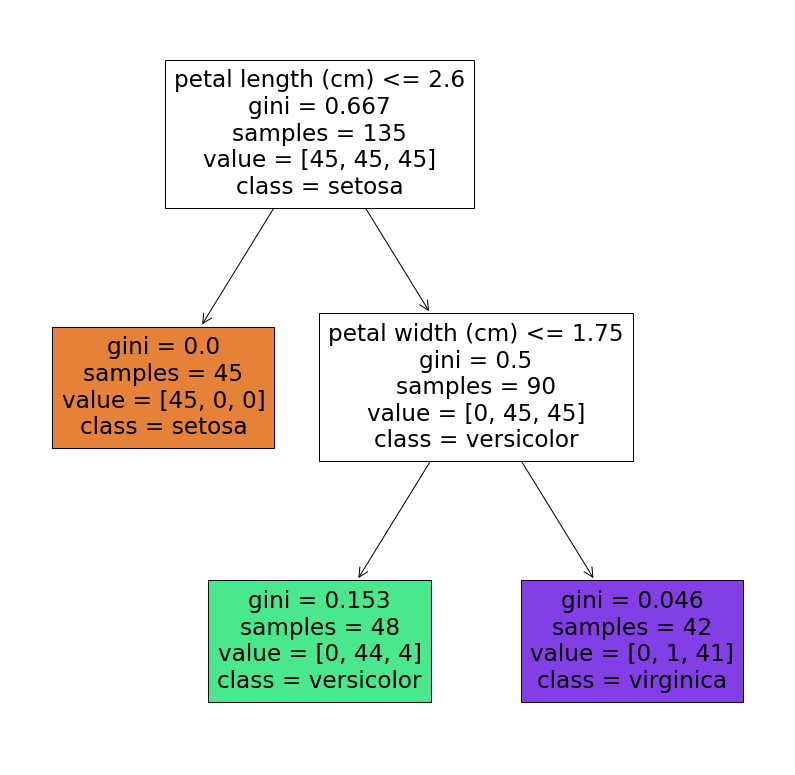

In [ ]:
# 把圖片印出來看看

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# ↓調整圖片大小
plt.figure(figsize=(14, 14))

plot_tree(
    clf, # ←樹的參數
    feature_names=iris["feature_names"], # ←帶入欄位名稱 -> df.columns.drop(["ans"]) 使用DataFrame的表示方式也可
    class_names=iris["target_names"], # ←帶入答案名稱 -> 同上
    filled=True # ←將圖表底色上色
)

In [ ]:
# 測試模型表現(看模型現在的參數表現如何)
# sklearn.metrics <- 看模型表現就是找這個函示庫裡的模組
from sklearn.metrics import accuracy_score

# 用上面訓練好的模型來預測測試題目
pre = clf.predict(x_test)

#              ↓正確答案 ↓預測答案
accuracy_score(y_test, pre)

# ↑透過accuracy_score去調整max_depth以避免過擬合導致模型準確率不增反減,max_depth透過創建決策樹時的參數設定來調整

0.9333333333333333